IMPORTING USEFUL LIBRARIES:

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Reading training data from file  

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Target
0,1,-10.429837,21.684251,93.056324,128.914740,1.657315,-34.602633,-70.314374,-89.585318,-98.465642,...,-99.322780,19.560135,25.568291,-40.876179,-116.146068,-82.181299,-99.423518,-41.150654,113.117197,5235.690928
1,2,12.475081,11.652011,-47.621889,-21.892583,-25.844861,-46.951253,-114.500805,-96.257473,-138.354981,...,-89.763107,-8.250307,-8.798353,-23.452091,-56.769063,-26.722372,-97.694304,13.816113,8.711894,-1221.442146
2,3,7.696188,24.729547,43.782383,-53.282523,-69.145794,-57.072335,-114.149171,-105.408739,-71.892560,...,-3.859655,-17.301240,-1.622924,-39.351214,-73.973949,-33.844638,-100.874861,-38.895598,34.488334,-1102.758862
3,4,6.505033,22.092605,-25.161422,4.742729,-20.344550,-50.248793,-89.324731,-104.002016,-160.103875,...,48.557507,-1.997502,-0.856194,-34.259923,-3.113819,13.398035,-94.899866,-77.051331,-16.014027,437.940266
4,5,5.906445,19.909180,24.705865,-51.875251,-24.857500,-25.879977,-37.787560,-99.587673,-47.929647,...,3.556973,-26.643253,-0.976567,-44.127974,-44.249542,-6.166813,-97.099111,-5.426910,-42.191157,755.825367


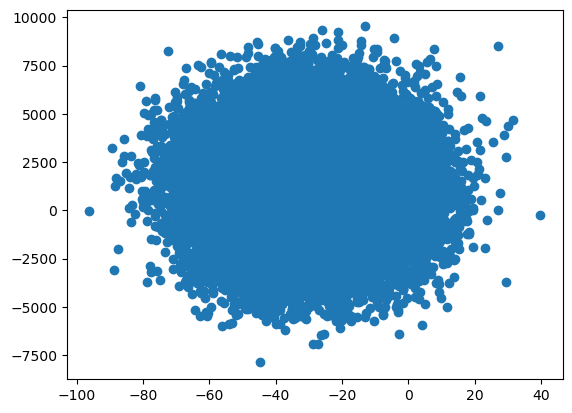

In [3]:
data = pd.read_csv("linear_regression_train.csv")
plt.scatter(data.Feature_5, data.Target)
data.head()

Extracting input and output data using pandas and normalisation

In [4]:
x= data.iloc[:,1:26]
y = data.iloc[:,26]
print(type(y))
print(type(x))
x = (x-x.mean())/x.std()
print(x.head())

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -1.698625   0.253141   1.138685   3.788759   2.119366   0.300747   
1   0.672010  -1.498956  -2.098547   0.000035   0.324729  -0.443846   
2   0.177399   0.784991   0.004812  -0.788573  -2.500846  -1.054124   
3   0.054116   0.324458  -1.581696   0.669192   0.683648  -0.642680   
4  -0.007837  -0.056869  -0.434169  -0.753218   0.389159   0.826703   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_16  Feature_17  \
0   0.553210   0.086296  -0.083339   -0.764211  ...    0.704123   -1.188415   
1  -0.719836  -0.490946  -1.071877   -1.618611  ...    0.378333   -0.985731   
2  -0.709705  -1.282670   0.575195    0.236001  ...    1.437571    0.835587   
3   0.005506  -1.160967  -1.610858   -1.510584  ...    0.346372    1.946931   
4   1.490332  -0.779059   1.169044   -0.002850  ...    0.417726    0.992834   

   Feature_18  Feature_1

1. Spliliting data into training and testing for cross validation }

In [6]:
x_train = x.to_numpy()
print(x_train.shape)
m = x_train.shape[0]
n = int(0.2*m)
x_test1 = x_train[:n,:]
x_train = x_train[n:,:]
y_train = y.to_numpy()

y_test1 = y_train[:n]
y_train = y_train[n:]
print(np.min(y_train))
print(np.max(y_train))
print(y_train.shape)

(48000, 25)
-7885.178865076816
9527.062129284232
(38400,)


Defining parameters and cost function

In [7]:
w_in = np.zeros(x_train.shape[1])
print(w_in.shape)

b_in = 0
def compute_cost(x,y,w,b,lambdaa):
    m = x.shape[0]
    f = np.dot(x,w) + b
    cost = (1/(2*m)) * (np.sum(np.square(f-y)) + lambdaa*(np.sum(np.square(w))) )
    return cost
def prediction (x,w,b):
    y_p = np.dot(x,w) + b
    return y_p    

(25,)


Defining gradient descent and parameter update 

In [8]:
def gradient_descent(x,y,w_in,b,alpha,num_iter,lambdaa):
    m = x.shape[0]
    jh = []
    rmse_h = [] 
    w = np.copy(w_in)
    wh = [] 
    c = 0
    for i in range(num_iter):
        f = np.dot(x,w) + b
        d_w = (1/m)*np.sum(np.dot((f-y),x)) +(lambdaa/m)*np.sum(w)
        db = (1/m)*np.sum(f-y)
        w -= alpha*d_w
        b -= alpha*db
        if i <10000:
            c =(compute_cost(x,y,w,b,lambdaa))
            y_pred = prediction(x_train,w,b)
            rmse = np.sqrt(np.mean(y_pred - y_train)**2)
            rmse_h.append(rmse)
            jh.append(c)

        if (i%(num_iter/10)== 0):
            print(f"cost at {i+1}th iteration is :{c} and rmse is :{rmse}") 
            wh.append(w)   
        
        
    return w,b,jh,wh,rmse_h    

Hyper parameters and Running the model

In [9]:
learning_rate = 0.01
iterations = 1000
regularisation_parameter =  100
w_f,b_f,J_history,W_history,RMSE_H = gradient_descent(x_train,y_train,w_in,b_in,learning_rate,iterations,regularisation_parameter)


print(RMSE_H[-1])

cost at 1th iteration is :2587733.4289541077 and rmse is :1238.2599077159175
cost at 101th iteration is :1255007.7447218532 and rmse is :452.46067433408183
cost at 201th iteration is :1166361.4055689487 and rmse is :165.6157888349279
cost at 301th iteration is :1154484.5191486313 and rmse is :60.62093584549435
cost at 401th iteration is :1152893.247220325 and rmse is :22.18929661619626
cost at 501th iteration is :1152680.047711615 and rmse is :8.122027109190144
cost at 601th iteration is :1152651.4831214244 and rmse is :2.9729344513909215
cost at 701th iteration is :1152647.656021551 and rmse is :1.0881937641241912
cost at 801th iteration is :1152647.1432645558 and rmse is :0.3983154313144985
cost at 901th iteration is :1152647.074565085 and rmse is :0.14579681308063944
0.05390557973467272


Plotting cost graph vs no. of iterations and RMSE 

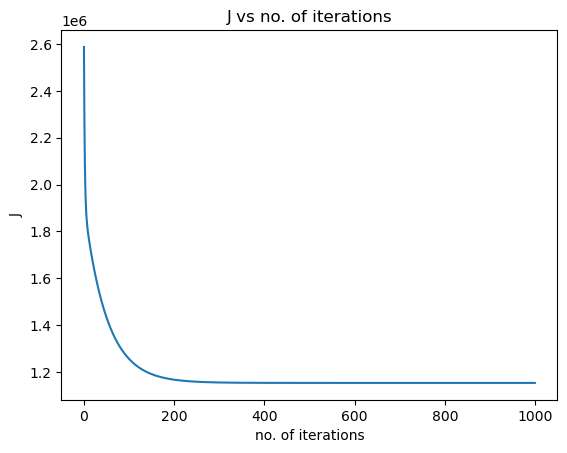

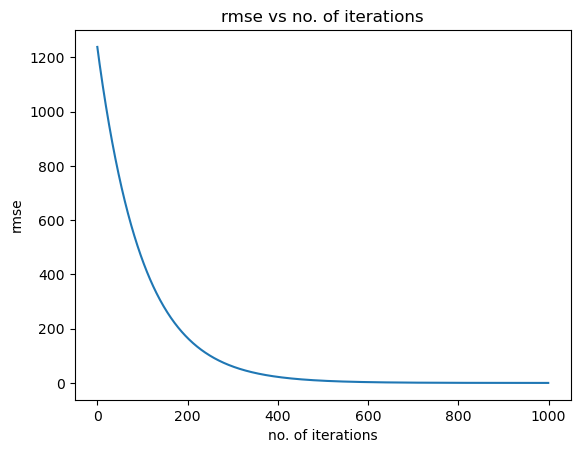

In [11]:
plt.plot(J_history)
plt.xlabel("no. of iterations")
plt.ylabel("J")
plt.title("J vs no. of iterations")
plt.show()

plt.plot(RMSE_H)
plt.xlabel("no. of iterations")
plt.ylabel("rmse")
plt.title("rmse vs no. of iterations")
plt.show()




Loading testing data and making predictions

In [12]:
test_data = pd.read_csv("linear_regression_test.csv")


x_t = test_data.iloc[:,1:26]
x_t = (x_t - x_t.mean())/x_t.std()

x_ttest = x_t.values
print(x_ttest.shape)
y = prediction(x_ttest,w_f,b_f)
print(y)

(12000, 25)
[ 2306.60247634  2679.31037851   440.18761643 ...   999.11555235
 -2249.21148366   454.54066952]
